In [ ]:
"""
Road Accident Severity Prediction Using Machine Learning

This project aims to predict the severity of casualties in road accidents using machine learning models.
The dataset contains various features such as accident location, time, road conditions, and vehicle involvement.
Given the severe class imbalance in casualty severity, the project focuses on handling this imbalance 
effectively while ensuring optimal model performance.

The primary objective is to create a model that accurately identifies severe casualties while 
minimizing misclassification, ensuring better risk assessment and accident prevention.
"""



In [ ]:
"""slight preprocessing/cleaning ajustment done in Excel power query"""

In [ ]:
#importing libraries

In [ ]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns
import os 
import warnings


In [ ]:
#Setting the working directory

In [400]:
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [401]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 100)

pd.set_option('display.float_format', '{:.2f}'.format)


In [ ]:
#Importing the dataset

In [402]:
data_folder = r'C:\Users\avish\Desktop\Final Project\data CSV'

In [403]:
import pandas as pd
df1 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2009.csv', encoding='latin1')
print(df1.shape)

(3057, 15)


In [404]:
df2 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2010.csv', encoding='latin1')
df1 = pd.concat([df1, df2], ignore_index=True)
df3 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2011.csv', encoding='latin1')
df1 = pd.concat([df1, df3], ignore_index=True)
df4 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2012.csv', encoding='latin1')
df1 = pd.concat([df1, df4], ignore_index=True)
df5 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2013.csv', encoding='latin1')
df1 = pd.concat([df1, df5], ignore_index=True)
df6 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2014.csv', encoding='latin1')
df1 = pd.concat([df1, df6], ignore_index=True)
df7 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2015.csv', encoding='latin1')
df1 = pd.concat([df1, df7], ignore_index=True)
df8 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2016.csv', encoding='latin1')
df1 = pd.concat([df1, df8], ignore_index=True)
df9 = pd.read_csv(r'C:\Users\avish\Desktop\Final Project\data CSV\2017.csv', encoding='latin1')
df1 = pd.concat([df1, df9], ignore_index=True)

In [405]:
df1.to_csv(r'C:\Users\avish\Desktop\Final Project\uncleaned_data.csv', index=False)

In [ ]:
#Initial data exploration

In [406]:
print( df1.shape)
df1.head()

(23638, 15)


,reference_number,easting,northing,number_of_vehicles,accident_date,time_24hr,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle
0,3309,429093,436258,1,2009-01-01,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,2609,434723,435534,1,2009-01-02,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,2809,441173,433047,1,2009-01-02,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,3809,428487,431364,1,2009-01-02,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,3909,425928,435480,2,2009-01-02,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [407]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23638 entries, 0 to 23637
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reference_number     23638 non-null  object
 1   easting              23638 non-null  int64 
 2   northing             23638 non-null  int64 
 3   number_of_vehicles   23638 non-null  int64 
 4   accident_date        23638 non-null  object
 5   time_24hr            23638 non-null  int64 
 6   1st_road_class       23638 non-null  object
 7   road_surface         23637 non-null  object
 8   lighting_conditions  23638 non-null  object
 9   weather_conditions   23638 non-null  object
 10  casualty_class       23638 non-null  object
 11  casualty_severity    23638 non-null  object
 12  sex_of_casualty      23638 non-null  object
 13  age_of_casualty      23638 non-null  int64 
 14  type_of_vehicle      23637 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.7+ MB


In [408]:
df1['accident_date']
df1['accident_date'].unique()

0        2009-01-01
1        2009-01-02
2        2009-01-02
3        2009-01-02
4        2009-01-02
            ...    
23633    12/31/2017
23634    12/31/2017
23635    12/31/2017
23636     1/11/2017
23637     6/27/2017
Name: accident_date, Length: 23638, dtype: object

array(['2009-01-01', '2009-01-02', '2009-01-03', ..., '12/29/2017',
       '12/30/2017', '12/31/2017'], shape=(3250,), dtype=object)

Please select the code you want me to review, and I will provide feedback on it.

In [ ]:
#Data Cleaning and Preprocessing

In [ ]:
#Cleaning the date column

def convert_mixed_date_formats(date):
    try:
        return pd.to_datetime(date, errors='raise', dayfirst=True).strftime('%Y-%m-%d')
    except Exception as e:
        return None 

df1['accident_date'] = df1['accident_date'].apply(convert_mixed_date_formats)
print(df1['accident_date'].head())
print(df1['accident_date'].isna().sum())


0    2009-01-01
1    2009-02-01
2    2009-02-01
3    2009-02-01
4    2009-02-01
Name: accident_date, dtype: object
0


In [410]:
nat_values_count = df1['accident_date'].isna().sum()

print(f"Number of NaT values in 'accident_date' column: {nat_values_count}")

Number of NaT values in 'accident_date' column: 0


In [411]:
df1.head()

,reference_number,easting,northing,number_of_vehicles,accident_date,time_24hr,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle
0,3309,429093,436258,1,2009-01-01,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,2609,434723,435534,1,2009-02-01,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,2809,441173,433047,1,2009-02-01,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,3809,428487,431364,1,2009-02-01,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,3909,425928,435480,2,2009-02-01,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [ ]:
#Cleaning the time column

In [412]:
def clean_time_format(time_str):
    time_str = time_str.zfill(4)
    
    if time_str.isdigit():
        time_int = int(time_str)
        if time_int < 0 or time_int > 2359: 
            return '00:00' 
        hours = time_int // 100
        minutes = time_int % 100
        if minutes >= 60:  
            return '00:00' 
        return f'{hours:02}:{minutes:02}'
    return '00:00' 


In [413]:
df1['time_24hr_cleaned'] = df1['time_24hr'].astype(str).apply(clean_time_format)
print(df1[['time_24hr', 'time_24hr_cleaned']].head())

   time_24hr time_24hr_cleaned
0         55             00:55
1       2335             23:35
2       1645             16:45
3       1723             17:23
4       1350             13:50


In [414]:
df1.head()

,reference_number,easting,northing,number_of_vehicles,accident_date,time_24hr,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle,time_24hr_cleaned
0,3309,429093,436258,1,2009-01-01,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,00:55
1,2609,434723,435534,1,2009-02-01,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,23:35
2,2809,441173,433047,1,2009-02-01,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,16:45
3,3809,428487,431364,1,2009-02-01,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,17:23
4,3909,425928,435480,2,2009-02-01,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,13:50


In [415]:
nat_values = df1[df1['time_24hr_cleaned'].isna()]

In [416]:
df1 = df1.drop(columns=['time_24hr'])
df1.head()


,reference_number,easting,northing,number_of_vehicles,accident_date,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle,time_24hr_cleaned
0,3309,429093,436258,1,2009-01-01,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,00:55
1,2609,434723,435534,1,2009-02-01,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,23:35
2,2809,441173,433047,1,2009-02-01,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,16:45
3,3809,428487,431364,1,2009-02-01,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,17:23
4,3909,425928,435480,2,2009-02-01,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,13:50


In [417]:
#DEEP CLEANING OF THE DATA 

In [418]:
df1.duplicated().sum()

np.int64(167)

In [419]:
df1 = df1.drop_duplicates()

In [420]:
df1.duplicated().sum()

np.int64(0)

In [421]:
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

road_surface       1
type_of_vehicle    1
dtype: int64


In [422]:
df1 = df1.dropna(axis=0)

In [423]:
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [424]:
df1['age_of_casualty'] = df1['age_of_casualty'].astype(int)
df1['accident_date'] = pd.to_datetime(df1['accident_date'], errors='coerce')


In [425]:
df1['lighting_conditions'] = df1['lighting_conditions'].str.lower().str.strip()

In [426]:
df1.isnull().sum()


reference_number       0
easting                0
northing               0
number_of_vehicles     0
accident_date          0
1st_road_class         0
road_surface           0
lighting_conditions    0
weather_conditions     0
casualty_class         0
casualty_severity      0
sex_of_casualty        0
age_of_casualty        0
type_of_vehicle        0
time_24hr_cleaned      0
dtype: int64

In [427]:
df1['type_of_vehicle'].unique()

array(['Car', 'Bus or coach (17 or more passenger seats)',
       'Taxi/Private hire car', 'M/cycle 50cc and under', 'Pedal cycle',
       'Other Vehicle', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Motorcycle over 500cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Goods vehicle 7.5 tonnes mgw and over',
       'Minibus (8 â\x80\x93 16 passenger seats)',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Minibus (8 â\x80\x93 16 passenger seat', 'Mobility Scooter',
       'Motorcycle - Unknown CC',
       'Minibus (8 Ã¢â\x82¬â\x80\x9c 16 passenger s', 'Other Vehicle ',
       'Minibus (8   16 passenger seats)', 'Tram / Light rail',
       'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc',
       'Motorcycle Motorcycle over 500cc0cc and under', 'Car0',
       'Pedal cyclePedal cycle',
       'Motorcycle Motorcycle over 

In [428]:
df1['type_of_vehicle'] = df1['type_of_vehicle'].replace({
    'Minibus (8 â\x80\x93 16 passenger seats)': 'Minibus (8-16 passenger seats)',
    'Minibus (8 â\x80\x93 16 passenger seat': 'Minibus (8-16 passenger seats)',
    'Minibus (8   16 passenger seats)': 'Minibus (8-16 passenger seats)',
    'Motorcycle over 500cccc to Motorcycle over 500cc00cc': 'Motorcycle',
    'Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc': 'Motorcycle',
    'Pedal cyclePedal cycle': 'Pedal cycle',
    'Motorcycle Motorcycle over 500cc0cc and underPedal cycle': 'Motorcycle',
    'CarTaxi/Private hire car': 'Car',
    'Pedal cycle0': 'Pedal cycle',
    'Motorcycle Motorcycle over 500cc0cc and underMotorcycle Motorcycle over 500cc0cc and under': 'Motorcycle',
    'Motorcycle - Unknown CC': 'Motorcycle'
})


In [429]:
df1['type_of_vehicle'].unique()


array(['Car', 'Bus or coach (17 or more passenger seats)',
       'Taxi/Private hire car', 'M/cycle 50cc and under', 'Pedal cycle',
       'Other Vehicle', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Motorcycle over 500cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Goods vehicle 7.5 tonnes mgw and over',
       'Minibus (8-16 passenger seats)',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Mobility Scooter', 'Motorcycle',
       'Minibus (8 Ã¢â\x82¬â\x80\x9c 16 passenger s', 'Other Vehicle ',
       'Tram / Light rail',
       'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc',
       'Motorcycle Motorcycle over 500cc0cc and under', 'Car0',
       'Pedal cycleCar', 'Motorcycle Motorcycle over 500cc0cc and under0',
       'Car7'], dtype=object)

In [430]:
df1['type_of_vehicle'] = df1['type_of_vehicle'].replace({
    'Car0': 'Car',
    'Pedal cycleCar': 'Car',
    'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc': 'Motorcycle',
    'Motorcycle Motorcycle over 500cc0cc and under': 'Motorcycle',
    'Motorcycle Motorcycle over 500cc0cc and under0': 'Motorcycle',
    'Other Vehicle ': 'Other Vehicle',
    'Minibus (8 Ã¢â\x82¬â\x80\x9c 16 passenger s': 'Minibus (8-16 passenger seats)',
    'Motorcycle over 500cccc to Motorcycle over 500cc00cc': 'Motorcycle',
    'Pedal cyclePedal cycle': 'Pedal cycle',
    'Motorcycle - Unknown CC': 'Motorcycle'
})

df1['type_of_vehicle'].unique()



array(['Car', 'Bus or coach (17 or more passenger seats)',
       'Taxi/Private hire car', 'M/cycle 50cc and under', 'Pedal cycle',
       'Other Vehicle', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Motorcycle over 500cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Goods vehicle 7.5 tonnes mgw and over',
       'Minibus (8-16 passenger seats)',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Mobility Scooter', 'Motorcycle', 'Tram / Light rail', 'Car7'],
      dtype=object)

In [431]:
df1['type_of_vehicle'] = df1['type_of_vehicle'].replace({
    'Car7': 'Car',
    'M/cycle 50cc and under': 'Motorcycle',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Motorcycle over 50cc and up to 125cc': 'Motorcycle',
    'Motorcycle over 500cc': 'Motorcycle',
    'Motorcycle': 'Motorcycle',
    'Minibus (8-16 passenger seats)': 'Minibus',
    'Bus or coach (17 or more passenger seats)': 'Bus',
    'Pedal cycle': 'Pedal cycle',
    'Other Vehicle': 'Other Vehicle',
    'Goods vehicle 3.5 tonnes mgw and under': 'Goods Vehicle',
    'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 'Goods Vehicle',
    'Goods vehicle 7.5 tonnes mgw and over': 'Goods Vehicle',
    'Agricultural vehicle (includes diggers etc.)': 'Other Vehicle',
    'Ridden horse': 'Other Vehicle',
    'Mobility Scooter': 'Other Vehicle',
    'Tram / Light rail': 'Other Vehicle',
    'Taxi/Private hire car': 'car',
    'Other Vehicle ': 'Other Vehicle'
})

df1['type_of_vehicle'].unique()


array(['Car', 'Bus', 'car', 'Motorcycle', 'Pedal cycle', 'Other Vehicle',
       'Goods Vehicle', 'Minibus'], dtype=object)

In [432]:
df1.head(200)

,reference_number,easting,northing,number_of_vehicles,accident_date,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle,time_24hr_cleaned
0,3309,429093,436258,1,2009-01-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,00:55
1,2609,434723,435534,1,2009-02-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,23:35
2,2809,441173,433047,1,2009-02-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,16:45
3,3809,428487,431364,1,2009-02-01,A,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,17:23
4,3909,425928,435480,2,2009-02-01,Unclassified,Dry,daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,13:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,70609,439643,436962,3,2009-01-28,Unclassified,Wet / Damp,daylight: street lights present,Fine without high winds,Driver,Slight,Female,24,Car,15:30
196,71409,425479,434192,1,2009-01-28,Unclassified,Wet / Damp,darkness: street lights present and lit,Fog or mist â if hazard,Pedestrian,Serious,Male,18,Car,17:40
197,73309,429797,433923,2,2009-01-28,Unclassified,Wet / Damp,daylight: street lights present,Fine without high winds,Driver,Slight,Female,28,Pedal cycle,10:00
198,88909,428678,435628,2,2009-01-28,A,Wet / Damp,darkness: street lights present and lit,Fog or mist â if hazard,Driver,Slight,Male,25,Pedal cycle,17:20


In [433]:
df1['type_of_vehicle'].unique()

array(['Car', 'Bus', 'car', 'Motorcycle', 'Pedal cycle', 'Other Vehicle',
       'Goods Vehicle', 'Minibus'], dtype=object)

In [434]:
df1['type_of_vehicle'] = df1['type_of_vehicle'].replace({
    'car': 'Car',
})

df1['type_of_vehicle'].unique()

array(['Car', 'Bus', 'Motorcycle', 'Pedal cycle', 'Other Vehicle',
       'Goods Vehicle', 'Minibus'], dtype=object)

In [435]:
column_names = df1.columns.tolist()
print(column_names)

['reference_number', 'easting', 'northing', 'number_of_vehicles', 'accident_date', '1st_road_class', 'road_surface', 'lighting_conditions', 'weather_conditions', 'casualty_class', 'casualty_severity', 'sex_of_casualty', 'age_of_casualty', 'type_of_vehicle', 'time_24hr_cleaned']


In [436]:
df1.head()


,reference_number,easting,northing,number_of_vehicles,accident_date,1st_road_class,road_surface,lighting_conditions,weather_conditions,casualty_class,casualty_severity,sex_of_casualty,age_of_casualty,type_of_vehicle,time_24hr_cleaned
0,3309,429093,436258,1,2009-01-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,00:55
1,2609,434723,435534,1,2009-02-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,23:35
2,2809,441173,433047,1,2009-02-01,Unclassified,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,16:45
3,3809,428487,431364,1,2009-02-01,A,Dry,darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,17:23
4,3909,425928,435480,2,2009-02-01,Unclassified,Dry,daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,13:50


In [437]:
unique_values = df1['1st_road_class'].unique()
print(unique_values)

['Unclassified' 'A' 'A(M)' 'B' 'Motorway' 'C' 'A643' 'A61' 'A653' 'U' 'M1'
 'A650' 'A58' 'A65' 'B6123' 'A660' 'M62' 'A658' 'M621' 'A58(M)' 'A647'
 'A657' 'B6159' 'B6157' 'A1(M)' 'A639' 'B1271' 'A63' 'A654' 'A168' 'B6135'
 'A6210' 'A6110' 'A6120' 'A64' 'B6154' 'A62' 'A656' 'B6156' 'A642' 'B6152'
 'B6129' 'B1217' 'B6137' 'A659' 'B6451' 'B6153' 'B6127' 'A6038' 'B6128'
 'B6164' 'B1224' 'A64(M)' 'B1' 'B6126' 'B6155' 'B6381']


In [438]:
value_counts = df1['1st_road_class'].value_counts()
print(value_counts)

1st_road_class
Unclassified    10433
A                7842
Motorway         1344
B                1188
U                1125
A(M)              454
A61                82
A58                79
A660               75
M1                 65
A6120              61
M62                60
A65                56
A653               47
A63                43
M621               40
A647               36
A6110              34
A64                31
B6157              30
C                  29
B6159              29
A650               29
A1(M)              27
A639               25
A62                24
A643               20
A58(M)             18
B6154              17
A658               16
A642               16
A656               13
A657               11
B6123              10
A654               10
A64(M)              9
A659                8
B6137               5
A6038               4
B6135               4
A168                2
B6152               2
B6156               2
B1271               1
A6210            

In [ ]:

df1['1st_road_class'] = df1['1st_road_class'].replace({
    'A58': 'A',
    'A660': 'A',
    'A6120': 'A',
    'A65': 'A',
    'A653': 'A',
    'A63': 'A',
    'A647': 'A',
    'A6110': 'A',
    'A64': 'A',
    'B6157': 'B',
    'C': 'C',
    'B6159': 'B',
    'A650': 'A',
    'A639': 'A',
    'A62': 'A',
    'A643': 'A',
    'B6154': 'B',
    'A658': 'A',
    'A642': 'A',
    'A656': 'A',
    'A657': 'A',
    'B6123': 'B',
    'A654': 'A',
    'A659': 'A',
    'B6137': 'B',
    'A6038': 'A',
    'B6135': 'B',
    'A168': 'A',
    'B6152': 'B',
    'B6156': 'B',
    'B1271': 'B',
    'A6210': 'A',
    'B6129': 'B',
    'B6451': 'B',
    'B6153': 'B',
    'B1217': 'B',
    'B6127': 'B',
    'B6128': 'B',
    'B6164': 'B',
    'B1224': 'B',
    'B1': 'B',
    'B6126': 'B',
    'B6155': 'B',
    'B6381': 'B'
})

unique_values = df1['1st_road_class'].unique()
print(unique_values)

value_counts = df1['1st_road_class'].value_counts()
print(value_counts)

['Unclassified' 'A' 'A(M)' 'B' 'Motorway' 'C' 'A61' 'U' 'M1' 'M62' 'M621'
 'A58(M)' 'A1(M)' 'A64(M)']
1st_road_class
Unclassified    10433
A                8483
Motorway         1344
B                1300
U                1125
A(M)              454
A61                82
M1                 65
M62                60
M621               40
C                  29
A1(M)              27
A58(M)             18
A64(M)              9
Name: count, dtype: int64


In [440]:
df1['1st_road_class'] = df1['1st_road_class'].replace({
    'U': 'Unclassified',
    'A61': 'A',
    'M1': 'A(M)',
    'M62': 'A(M)',
    'M621': 'A(M)',
    'A1(M)': 'A(M)',
    'A58(M)': 'A(M)',
    'A64(M)': 'A(M)'
   
})

unique_values = df1['1st_road_class'].unique()
print(unique_values)
value_counts = df1['1st_road_class'].value_counts()
print(value_counts)

['Unclassified' 'A' 'A(M)' 'B' 'Motorway' 'C']
1st_road_class
Unclassified    11558
A                8565
Motorway         1344
B                1300
A(M)              673
C                  29
Name: count, dtype: int64


In [441]:
df1['1st_road_class'] = df1['1st_road_class'].replace({
    'U': 'Unclassified',
    'A61': 'A',
    'A58': 'A',
    'Motorcycle over 50cc and up to 125cc': 'Motorcycle',
    'Motorcycle over 500cc': 'Motorcycle',
    'Motorcycle': 'Motorcycle',
    'Minibus (8-16 passenger seats)': 'Minibus',
    'Bus or coach (17 or more passenger seats)': 'Bus',
    'Pedal cycle': 'Pedal cycle',
    'Other Vehicle': 'Other Vehicle',
    'Goods vehicle 3.5 tonnes mgw and under': 'Goods Vehicle',
    'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 'Goods Vehicle',
    'Goods vehicle 7.5 tonnes mgw and over': 'Goods Vehicle',
    'Agricultural vehicle (includes diggers etc.)': 'Other Vehicle',
    'Ridden horse': 'Other Vehicle',
    'Mobility Scooter': 'Other Vehicle',
    'Tram / Light rail': 'Other Vehicle',
    'Taxi/Private hire car': 'car',
    'Other Vehicle ': 'Other Vehicle'
})


In [442]:
value_counts = df1['casualty_severity'].value_counts()
print(value_counts)

casualty_severity
Slight     20626
Serious     2684
Fatal        159
Name: count, dtype: int64


In [443]:
#END OF DEEP CLEANING

In [444]:
#ENCODING THE DATA 

In [445]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    "1st_road_class", "road_surface", "lighting_conditions", 
    "weather_conditions", "casualty_class", "casualty_severity", 
    "sex_of_casualty", "type_of_vehicle"
]

severity_mapping = {"Slight": 0, "Serious": 1, "Fatal": 2}
df1["casualty_severity"] = df1["casualty_severity"].map(severity_mapping)

df1 = pd.get_dummies(df1, columns=["1st_road_class", "road_surface", "lighting_conditions",
                                   "weather_conditions", "casualty_class", "sex_of_casualty",
                                   "type_of_vehicle"], drop_first=True)



In [446]:
df1.head()

,reference_number,easting,northing,number_of_vehicles,accident_date,casualty_severity,age_of_casualty,time_24hr_cleaned,1st_road_class_A(M),1st_road_class_B,1st_road_class_C,1st_road_class_Motorway,1st_road_class_Unclassified,road_surface_Dry,road_surface_Flood,road_surface_Flood (surface water over 3cm deep),road_surface_Frost / Ice,road_surface_Frost/ Ice,road_surface_Frost/Ice,road_surface_Snow,road_surface_Wet / Damp,road_surface_Wet/Damp,lighting_conditions_darkness: no street lighting,lighting_conditions_darkness: street lighting unknown,lighting_conditions_darkness: street lights present and lit,lighting_conditions_darkness: street lights present and lit and lit,lighting_conditions_darkness: street lights present but unlit,lighting_conditions_daylight: street lights present,weather_conditions_Fine with high winds,weather_conditions_Fine without high winds,weather_conditions_Fog or mist if hazard,weather_conditions_Fog or mist (if hazard),weather_conditions_Fog or mist â if haza,weather_conditions_Fog or mist â if hazard,weather_conditions_Other,weather_conditions_Raining with high winds,weather_conditions_Raining without high winds,weather_conditions_Snowing with high winds,weather_conditions_Snowing without high winds,weather_conditions_Unknown,casualty_class_Driver or rider,casualty_class_Driver/Rider,casualty_class_Passenger,casualty_class_Pedestrian,casualty_class_Vehicle or pillion passenger,sex_of_casualty_Male,type_of_vehicle_Car,type_of_vehicle_Goods Vehicle,type_of_vehicle_Minibus,type_of_vehicle_Motorcycle,type_of_vehicle_Other Vehicle,type_of_vehicle_Pedal cycle
0,3309,429093,436258,1,2009-01-01,0,44,00:55,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False
1,2609,434723,435534,1,2009-02-01,1,23,23:35,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2809,441173,433047,1,2009-02-01,0,12,16:45,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,3809,428487,431364,1,2009-02-01,0,15,17:23,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False
4,3909,425928,435480,2,2009-02-01,0,34,13:50,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [447]:
#PREPROCESSING THE DATA BEFORE MODELING/ NECCESSARY ADJUSTMENTS FROM RAW DATA

In [448]:
df1 = df1.drop(columns=['reference_number'])

In [449]:
print(df1.columns)

Index(['easting', 'northing', 'number_of_vehicles', 'accident_date',
       'casualty_severity', 'age_of_casualty', 'time_24hr_cleaned',
       '1st_road_class_A(M)', '1st_road_class_B', '1st_road_class_C',
       '1st_road_class_Motorway', '1st_road_class_Unclassified',
       'road_surface_Dry', 'road_surface_Flood',
       'road_surface_Flood (surface water over 3cm deep)',
       'road_surface_Frost / Ice', 'road_surface_Frost/ Ice',
       'road_surface_Frost/Ice', 'road_surface_Snow',
       'road_surface_Wet / Damp', 'road_surface_Wet/Damp',
       'lighting_conditions_darkness: no street lighting',
       'lighting_conditions_darkness: street lighting unknown',
       'lighting_conditions_darkness: street lights present and lit',
       'lighting_conditions_darkness: street lights present and lit and lit',
       'lighting_conditions_darkness: street lights present but unlit',
       'lighting_conditions_daylight: street lights present',
       'weather_conditions_Fine with hig

In [450]:

df1['accident_day_of_week'] = df1['accident_date'].dt.dayofweek  

df1['accident_week'] = df1['accident_date'].dt.isocalendar().week  

df1['accident_hour'] = df1['time_24hr_cleaned'].apply(lambda x: int(x.split(':')[0]))


In [451]:
print(df1[['accident_day_of_week', 'accident_week', 'accident_hour']].head())


   accident_day_of_week  accident_week  accident_hour
0                     3              1              0
1                     6              5             23
2                     6              5             16
3                     6              5             17
4                     6              5             13


In [452]:
print([col for col in df1.columns if 'road_surface' in col])
print([col for col in df1.columns if 'lighting_conditions' in col])
print([col for col in df1.columns if 'weather_conditions' in col])


['road_surface_Dry', 'road_surface_Flood', 'road_surface_Flood (surface water over 3cm deep)', 'road_surface_Frost / Ice', 'road_surface_Frost/ Ice', 'road_surface_Frost/Ice', 'road_surface_Snow', 'road_surface_Wet / Damp', 'road_surface_Wet/Damp']
['lighting_conditions_darkness: no street lighting', 'lighting_conditions_darkness: street lighting unknown', 'lighting_conditions_darkness: street lights present and lit', 'lighting_conditions_darkness: street lights present and lit and lit', 'lighting_conditions_darkness: street lights present but unlit', 'lighting_conditions_daylight: street lights present']
['weather_conditions_Fine with high winds', 'weather_conditions_Fine without high winds', 'weather_conditions_Fog or mist   if hazard', 'weather_conditions_Fog or mist (if hazard)', 'weather_conditions_Fog or mist â\x80\x93 if haza', 'weather_conditions_Fog or mist â\x80\x93 if hazard', 'weather_conditions_Other', 'weather_conditions_Raining with high winds', 'weather_conditions_Raini

In [453]:
df1.columns = df1.columns.str.lower().str.replace(r'[^a-z0-9]', '_', regex=True).str.strip('_')

In [454]:
print(df1.columns.tolist())

['easting', 'northing', 'number_of_vehicles', 'accident_date', 'casualty_severity', 'age_of_casualty', 'time_24hr_cleaned', '1st_road_class_a_m', '1st_road_class_b', '1st_road_class_c', '1st_road_class_motorway', '1st_road_class_unclassified', 'road_surface_dry', 'road_surface_flood', 'road_surface_flood__surface_water_over_3cm_deep', 'road_surface_frost___ice', 'road_surface_frost__ice', 'road_surface_frost_ice', 'road_surface_snow', 'road_surface_wet___damp', 'road_surface_wet_damp', 'lighting_conditions_darkness__no_street_lighting', 'lighting_conditions_darkness__street_lighting_unknown', 'lighting_conditions_darkness__street_lights_present_and_lit', 'lighting_conditions_darkness__street_lights_present_and_lit_and_lit', 'lighting_conditions_darkness__street_lights_present_but_unlit', 'lighting_conditions_daylight__street_lights_present', 'weather_conditions_fine_with_high_winds', 'weather_conditions_fine_without_high_winds', 'weather_conditions_fog_or_mist___if_hazard', 'weather_co

In [455]:
print([col for col in df1.columns if 'road_surface' in col])
print([col for col in df1.columns if 'lighting_conditions' in col])
print([col for col in df1.columns if 'weather_conditions' in col])


['road_surface_dry', 'road_surface_flood', 'road_surface_flood__surface_water_over_3cm_deep', 'road_surface_frost___ice', 'road_surface_frost__ice', 'road_surface_frost_ice', 'road_surface_snow', 'road_surface_wet___damp', 'road_surface_wet_damp']
['lighting_conditions_darkness__no_street_lighting', 'lighting_conditions_darkness__street_lighting_unknown', 'lighting_conditions_darkness__street_lights_present_and_lit', 'lighting_conditions_darkness__street_lights_present_and_lit_and_lit', 'lighting_conditions_darkness__street_lights_present_but_unlit', 'lighting_conditions_daylight__street_lights_present']
['weather_conditions_fine_with_high_winds', 'weather_conditions_fine_without_high_winds', 'weather_conditions_fog_or_mist___if_hazard', 'weather_conditions_fog_or_mist__if_hazard', 'weather_conditions_fog_or_mist_____if_haza', 'weather_conditions_fog_or_mist_____if_hazard', 'weather_conditions_other', 'weather_conditions_raining_with_high_winds', 'weather_conditions_raining_without_hig

In [456]:
feature_columns = [
    'accident_hour', 'accident_day_of_week', 'accident_week',
    'road_surface_dry', 'road_surface_wet_damp',
    'lighting_conditions_daylight_street_lights_present', 
    'lighting_conditions_darkness_street_lights_present_and_lit',
    'weather_conditions_fine_without_high_winds', 
    'weather_conditions_raining_without_high_winds'
]

feature_columns = [col for col in feature_columns if col in df1.columns]

print(feature_columns)


['accident_hour', 'accident_day_of_week', 'accident_week', 'road_surface_dry', 'road_surface_wet_damp', 'weather_conditions_fine_without_high_winds', 'weather_conditions_raining_without_high_winds']


In [457]:
X = df1[feature_columns]
y = df1['casualty_severity'] 

In [458]:
df1['road_surface_flood'] = df1[['road_surface_flood', 'road_surface_flood__surface_water_over_3cm_deep']].max(axis=1)
df1 = df1.drop(columns=['road_surface_flood__surface_water_over_3cm_deep'])


In [459]:
df1['road_surface_frost'] = df1[['road_surface_frost___ice', 'road_surface_frost__ice', 'road_surface_frost_ice']].max(axis=1)
df1 = df1.drop(columns=['road_surface_frost___ice', 'road_surface_frost__ice','road_surface_frost_ice'])

In [460]:
df1['road_surface_wet'] = df1[['road_surface_wet___damp', 'road_surface_wet_damp']].max(axis=1)
df1 = df1.drop(columns=['road_surface_wet___damp', 'road_surface_wet_damp'])

In [461]:
# List all columns starting with 'road_surface'
road_surface_columns = [col for col in df1.columns if col.startswith('road_surface')]
print(road_surface_columns)

['road_surface_dry', 'road_surface_flood', 'road_surface_snow', 'road_surface_frost', 'road_surface_wet']


In [462]:
df1 = df1.rename(columns={'lighting_conditions_darkness__no_street_lighting': 'lighting_conditions_darkness_no_street_lighting'})
df1 = df1.rename(columns={'lighting_conditions_darkness__street_lighting_unknown': 'lighting_conditions_darkness_street_lighting_unknown'})

df1['lighting_conditions_darkness_street_lights_present_and_lit'] = df1[['lighting_conditions_darkness__street_lights_present_and_lit', 'lighting_conditions_darkness__street_lights_present_and_lit_and_lit']].max(axis=1)
df1 = df1.drop(columns=['lighting_conditions_darkness__street_lights_present_and_lit', 'lighting_conditions_darkness__street_lights_present_and_lit_and_lit'])

df1 = df1.rename(columns={'lighting_conditions_darkness__street_lights_present_but_unlit': 'lighting_conditions_darkness_street_lights_present_but_unlit'})
df1 = df1.rename(columns={'lighting_conditions_daylight__street_lights_present': 'lighting_conditions_daylight_street_lights_present'})

In [463]:
df1.head()

,easting,northing,number_of_vehicles,accident_date,casualty_severity,age_of_casualty,time_24hr_cleaned,1st_road_class_a_m,1st_road_class_b,1st_road_class_c,1st_road_class_motorway,1st_road_class_unclassified,road_surface_dry,road_surface_flood,road_surface_snow,lighting_conditions_darkness_no_street_lighting,lighting_conditions_darkness_street_lighting_unknown,lighting_conditions_darkness_street_lights_present_but_unlit,lighting_conditions_daylight_street_lights_present,weather_conditions_fine_with_high_winds,weather_conditions_fine_without_high_winds,weather_conditions_fog_or_mist___if_hazard,weather_conditions_fog_or_mist__if_hazard,weather_conditions_fog_or_mist_____if_haza,weather_conditions_fog_or_mist_____if_hazard,weather_conditions_other,weather_conditions_raining_with_high_winds,weather_conditions_raining_without_high_winds,weather_conditions_snowing_with_high_winds,weather_conditions_snowing_without_high_winds,weather_conditions_unknown,casualty_class_driver_or_rider,casualty_class_driver_rider,casualty_class_passenger,casualty_class_pedestrian,casualty_class_vehicle_or_pillion_passenger,sex_of_casualty_male,type_of_vehicle_car,type_of_vehicle_goods_vehicle,type_of_vehicle_minibus,type_of_vehicle_motorcycle,type_of_vehicle_other_vehicle,type_of_vehicle_pedal_cycle,accident_day_of_week,accident_week,accident_hour,road_surface_frost,road_surface_wet,lighting_conditions_darkness_street_lights_present_and_lit
0,429093,436258,1,2009-01-01,0,44,00:55,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,3,1,0,False,False,True
1,434723,435534,1,2009-02-01,1,23,23:35,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,6,5,23,False,False,True
2,441173,433047,1,2009-02-01,0,12,16:45,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,6,5,16,False,False,True
3,428487,431364,1,2009-02-01,0,15,17:23,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,6,5,17,False,False,True
4,425928,435480,2,2009-02-01,0,34,13:50,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,6,5,13,False,False,False


In [464]:
df1['weather_conditions_fog_or_mist'] = df1[['weather_conditions_fog_or_mist___if_hazard', 
                                             'weather_conditions_fog_or_mist__if_hazard', 
                                             'weather_conditions_fog_or_mist_____if_haza', 
                                             'weather_conditions_fog_or_mist_____if_hazard']].max(axis=1)

df1 = df1.drop(columns=['weather_conditions_fog_or_mist___if_hazard', 
                        'weather_conditions_fog_or_mist__if_hazard', 
                        'weather_conditions_fog_or_mist_____if_haza', 
                        'weather_conditions_fog_or_mist_____if_hazard'])


In [465]:
df1['weather_conditions_no_report'] = df1[['weather_conditions_other', 'weather_conditions_unknown']].max(axis=1)
df1 = df1.drop(columns=['weather_conditions_other', 'weather_conditions_unknown'])

In [466]:
df1['casualty_class_driver'] = df1[['casualty_class_driver_or_rider', 'casualty_class_driver_rider']].max(axis=1)
df1 = df1.drop(columns=['casualty_class_driver_or_rider', 'casualty_class_driver_rider'])

df1['casualty_class_passenger'] = df1[['casualty_class_passenger', 'casualty_class_vehicle_or_pillion_passenger']].max(axis=1)
df1 = df1.drop(columns=['casualty_class_vehicle_or_pillion_passenger'])

In [467]:
df1.head()

,easting,northing,number_of_vehicles,accident_date,casualty_severity,age_of_casualty,time_24hr_cleaned,1st_road_class_a_m,1st_road_class_b,1st_road_class_c,1st_road_class_motorway,1st_road_class_unclassified,road_surface_dry,road_surface_flood,road_surface_snow,lighting_conditions_darkness_no_street_lighting,lighting_conditions_darkness_street_lighting_unknown,lighting_conditions_darkness_street_lights_present_but_unlit,lighting_conditions_daylight_street_lights_present,weather_conditions_fine_with_high_winds,weather_conditions_fine_without_high_winds,weather_conditions_raining_with_high_winds,weather_conditions_raining_without_high_winds,weather_conditions_snowing_with_high_winds,weather_conditions_snowing_without_high_winds,casualty_class_passenger,casualty_class_pedestrian,sex_of_casualty_male,type_of_vehicle_car,type_of_vehicle_goods_vehicle,type_of_vehicle_minibus,type_of_vehicle_motorcycle,type_of_vehicle_other_vehicle,type_of_vehicle_pedal_cycle,accident_day_of_week,accident_week,accident_hour,road_surface_frost,road_surface_wet,lighting_conditions_darkness_street_lights_present_and_lit,weather_conditions_fog_or_mist,weather_conditions_no_report,casualty_class_driver
0,429093,436258,1,2009-01-01,0,44,00:55,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,3,1,0,False,False,True,False,False,False
1,434723,435534,1,2009-02-01,1,23,23:35,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,6,5,23,False,False,True,False,False,False
2,441173,433047,1,2009-02-01,0,12,16:45,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,6,5,16,False,False,True,False,False,False
3,428487,431364,1,2009-02-01,0,15,17:23,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,6,5,17,False,False,True,False,False,False
4,425928,435480,2,2009-02-01,0,34,13:50,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,6,5,13,False,False,False,False,False,False


In [468]:
# CLEAN DATA VISUALIZATION

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='accident_hour', ylabel='count'>

Text(0.5, 1.0, 'Accident Distribution by Hour of Day')

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Number of Accidents')

([<matplotlib.axis.XTick at 0x21f38ecd590>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

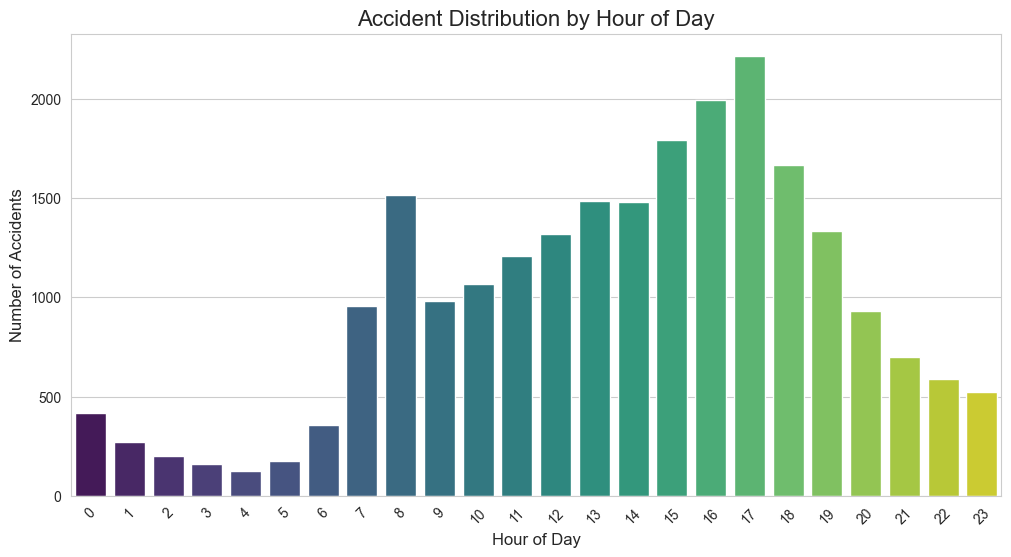

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1['accident_hour'] = pd.to_datetime(df1['time_24hr_cleaned'], format='%H:%M').dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='accident_hour', palette='viridis')
plt.title("Accident Distribution by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(range(0, 24), rotation=45) 
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='accident_day_of_week', ylabel='count'>

Text(0.5, 1.0, 'Accident Distribution by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Accidents')

([<matplotlib.axis.XTick at 0x21f3a04f9d0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

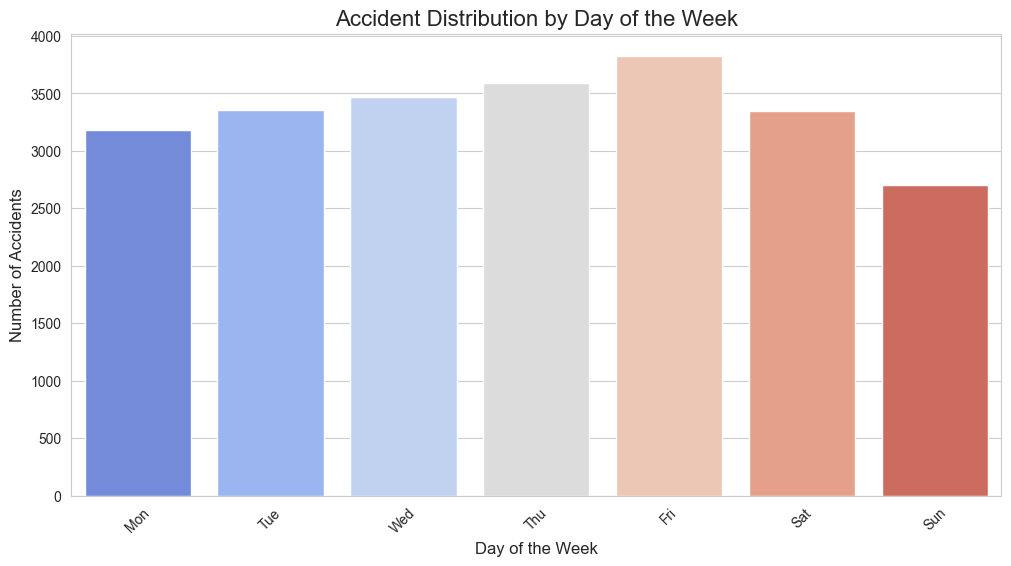

In [470]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='accident_day_of_week', palette='coolwarm')
plt.title("Accident Distribution by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation between Lighting Conditions')

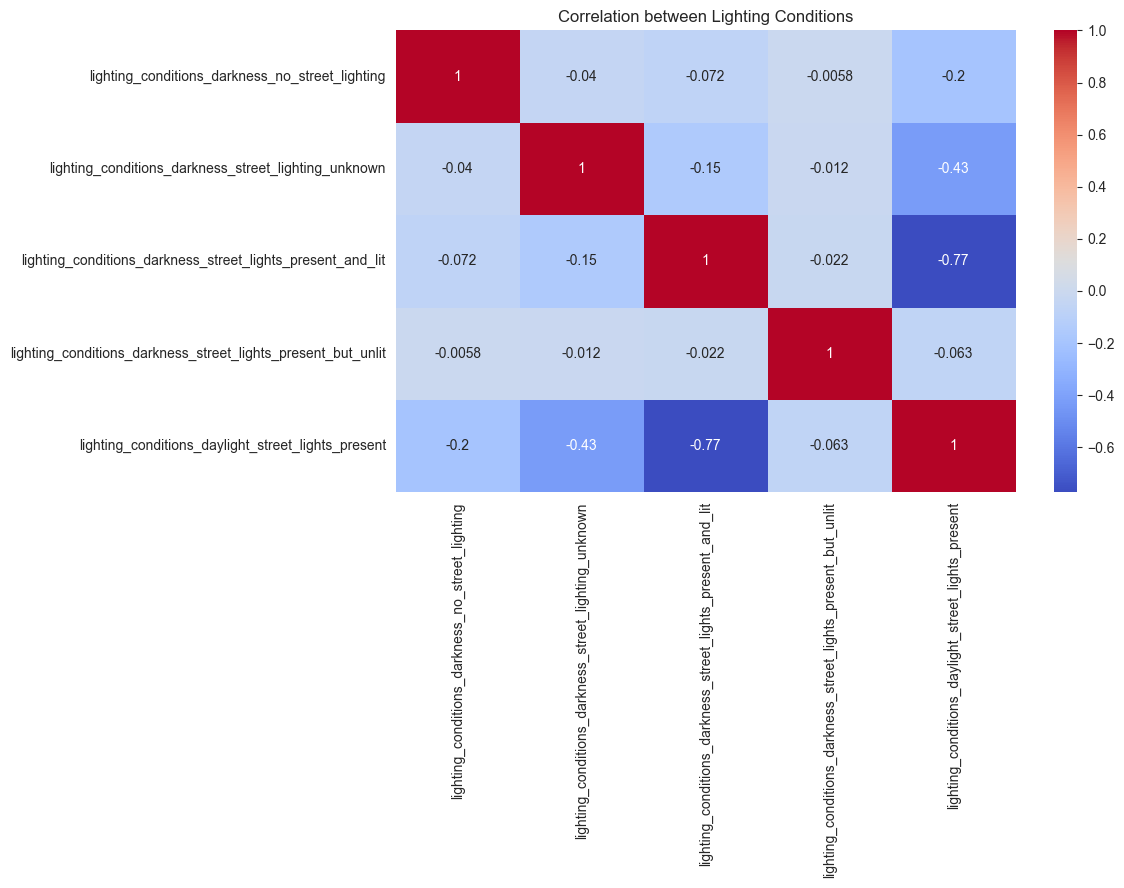

In [471]:

plt.figure(figsize=(10, 6))
sns.heatmap(df1[['lighting_conditions_darkness_no_street_lighting', 
                 'lighting_conditions_darkness_street_lighting_unknown', 
                 'lighting_conditions_darkness_street_lights_present_and_lit',
                 'lighting_conditions_darkness_street_lights_present_but_unlit',
                 'lighting_conditions_daylight_street_lights_present']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation between Lighting Conditions')
plt.show()



<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Accident Geospatial Distribution (Easting vs. Northing)')

Text(0.5, 0, 'easting')

Text(0, 0.5, 'northing')

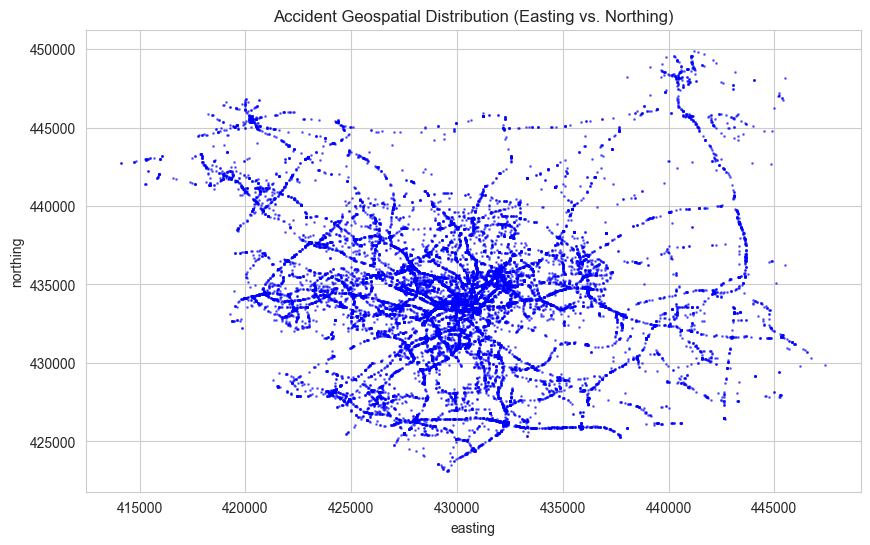

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df1['easting'], df1['northing'], alpha=0.5, s=1, color='blue')
plt.title('Accident Geospatial Distribution (Easting vs. Northing)')
plt.xlabel('easting')
plt.ylabel('northing')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='casualty_severity', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Casualty Severity')

Text(0.5, 0, 'Casualty Severity')

Text(0, 0.5, 'Number of Cases')

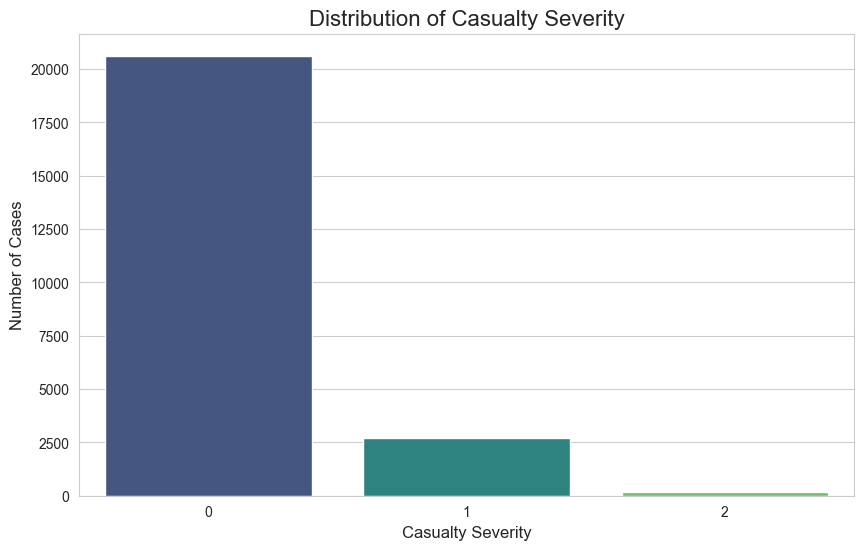

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='casualty_severity', palette='viridis')
plt.title("Distribution of Casualty Severity", fontsize=16)
plt.xlabel("Casualty Severity", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None'>

Text(0.5, 1.0, 'Distribution of Road Surface Conditions')

Text(0.5, 0, 'Road Surface Condition')

Text(0, 0.5, 'Number of Accidents')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'road_surface_dry'),
  Text(1, 0, 'road_surface_flood'),
  Text(2, 0, 'road_surface_snow'),
  Text(3, 0, 'road_surface_frost'),
  Text(4, 0, 'road_surface_wet')])

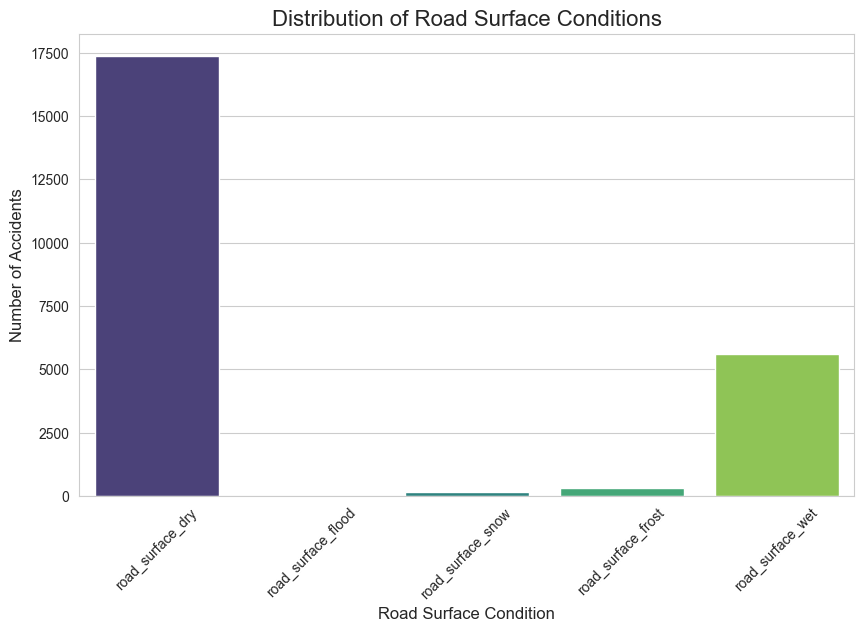

In [474]:
road_surface_columns = [col for col in df1.columns if col.startswith('road_surface')]
road_surface_data = df1[road_surface_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_data.index, y=road_surface_data.values, palette='viridis')
plt.title('Distribution of Road Surface Conditions', fontsize=16)
plt.xlabel('Road Surface Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None'>

Text(0.5, 1.0, 'Distribution of Lighting Conditions')

Text(0.5, 0, 'Lighting Condition')

Text(0, 0.5, 'Number of Accidents')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'lighting_conditions_darkness_no_street_lighting'),
  Text(1, 0, 'lighting_conditions_darkness_street_lighting_unknown'),
  Text(2, 0, 'lighting_conditions_darkness_street_lights_present_but_unlit'),
  Text(3, 0, 'lighting_conditions_daylight_street_lights_present'),
  Text(4, 0, 'lighting_conditions_darkness_street_lights_present_and_lit')])

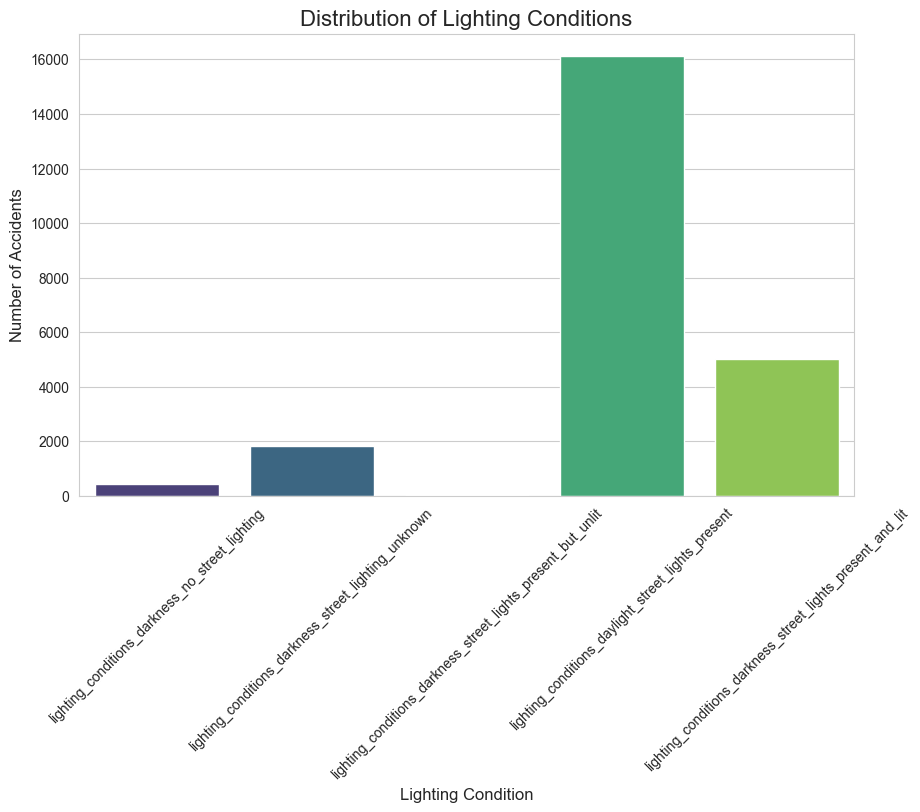

In [ ]:

lighting_conditions_columns = [col for col in df1.columns if col.startswith('lighting_conditions')]
lighting_conditions_data = df1[lighting_conditions_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=lighting_conditions_data.index, y=lighting_conditions_data.values, palette='viridis')
plt.title('Distribution of Lighting Conditions', fontsize=16)
plt.xlabel('Lighting Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None'>

Text(0.5, 1.0, 'Distribution of Weather Conditions')

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Number of Accidents')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'weather_conditions_fine_with_high_winds'),
  Text(1, 0, 'weather_conditions_fine_without_high_winds'),
  Text(2, 0, 'weather_conditions_raining_with_high_winds'),
  Text(3, 0, 'weather_conditions_raining_without_high_winds'),
  Text(4, 0, 'weather_conditions_snowing_with_high_winds'),
  Text(5, 0, 'weather_conditions_snowing_without_high_winds'),
  Text(6, 0, 'weather_conditions_fog_or_mist'),
  Text(7, 0, 'weather_conditions_no_report')])

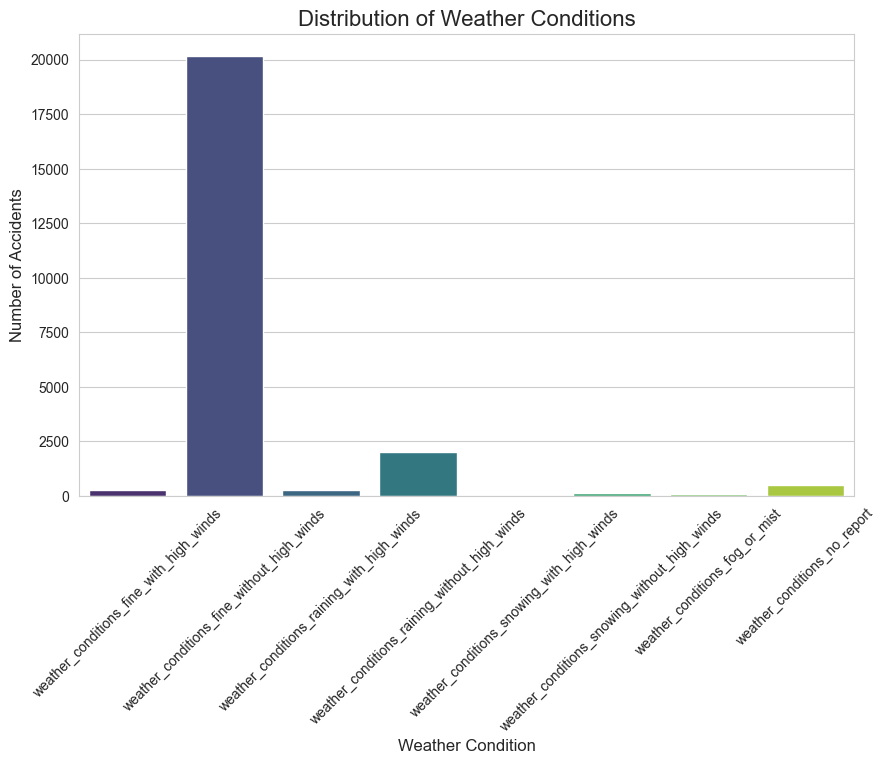

In [ ]:

weather_conditions_columns = [col for col in df1.columns if col.startswith('weather_conditions')]
weather_conditions_data = df1[weather_conditions_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions_data.index, y=weather_conditions_data.values, palette='viridis')
plt.title('Distribution of Weather Conditions', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None'>

Text(0.5, 1.0, 'Distribution of Road Classes')

Text(0.5, 0, 'Road Class')

Text(0, 0.5, 'Number of Accidents')

([0, 1, 2, 3, 4],
 [Text(0, 0, '1st_road_class_a_m'),
  Text(1, 0, '1st_road_class_b'),
  Text(2, 0, '1st_road_class_c'),
  Text(3, 0, '1st_road_class_motorway'),
  Text(4, 0, '1st_road_class_unclassified')])

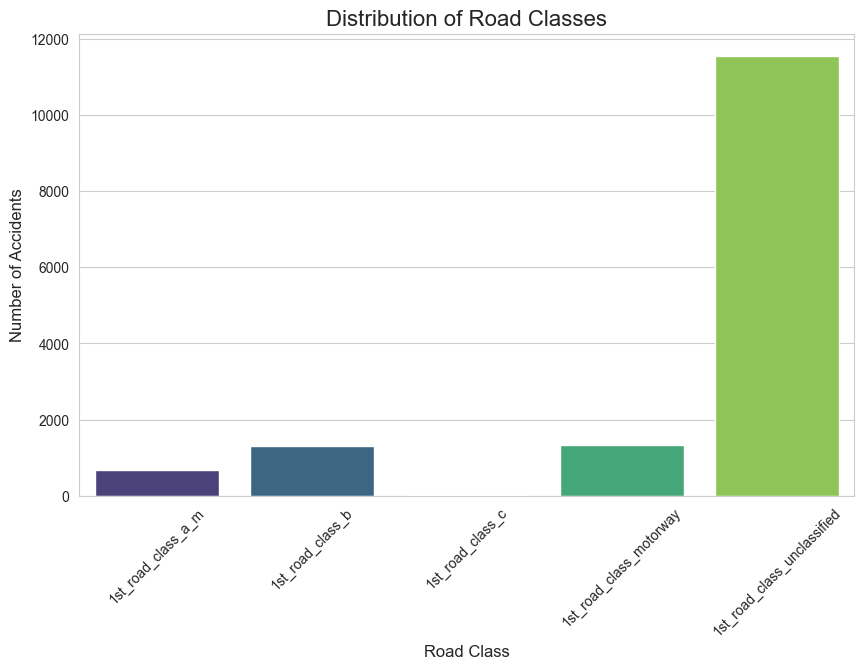

In [ ]:

road_class_columns = [col for col in df1.columns if col.startswith('1st_road_class')]
road_class_data = df1[road_class_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=road_class_data.index, y=road_class_data.values, palette='viridis')
plt.title('Distribution of Road Classes', fontsize=16)
plt.xlabel('Road Class', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None'>

Text(0.5, 1.0, 'Distribution of Vehicle Types')

Text(0.5, 0, 'Type of Vehicle')

Text(0, 0.5, 'Number of Accidents')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'type_of_vehicle_car'),
  Text(1, 0, 'type_of_vehicle_goods_vehicle'),
  Text(2, 0, 'type_of_vehicle_minibus'),
  Text(3, 0, 'type_of_vehicle_motorcycle'),
  Text(4, 0, 'type_of_vehicle_other_vehicle'),
  Text(5, 0, 'type_of_vehicle_pedal_cycle')])

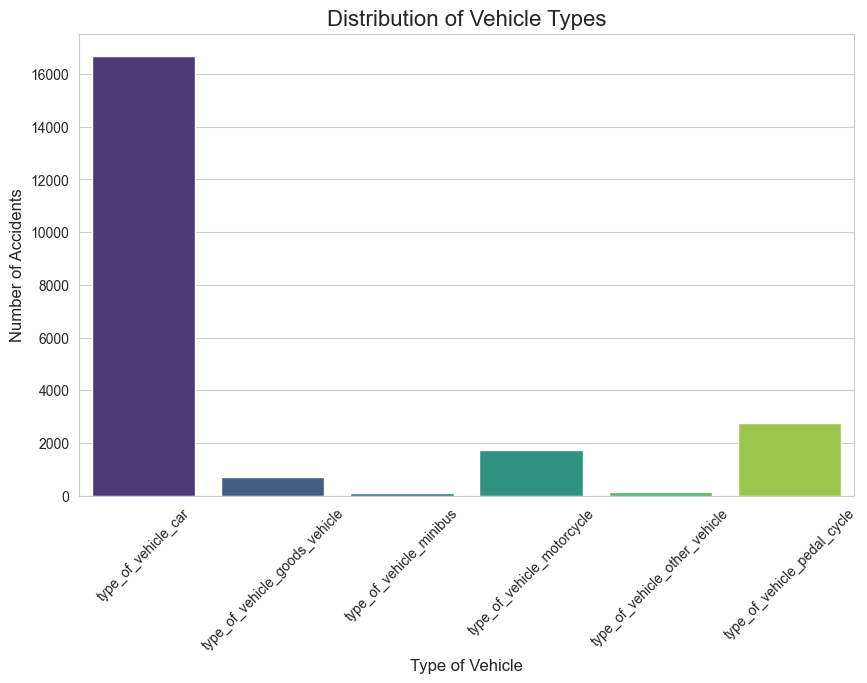

In [ ]:

type_of_vehicle_columns = [col for col in df1.columns if col.startswith('type_of_vehicle')]
type_of_vehicle_data = df1[type_of_vehicle_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_of_vehicle_data.index, y=type_of_vehicle_data.values, palette='viridis')
plt.title('Distribution of Vehicle Types', fontsize=16)
plt.xlabel('Type of Vehicle', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='age_of_casualty', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age and Sex of Casualties')

Text(0.5, 0, 'Age of Casualty')

Text(0, 0.5, 'Number of Casualties')

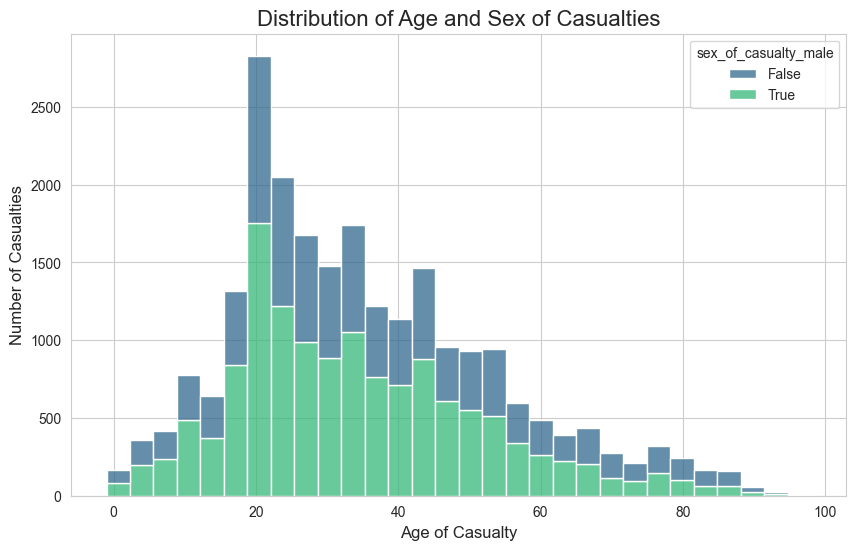

In [479]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='age_of_casualty', hue='sex_of_casualty_male', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Age and Sex of Casualties', fontsize=16)
plt.xlabel('Age of Casualty', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.show()

In [480]:
#FINAL ADJUSTMENTS BEFORE MODELING

In [481]:
df1['accident_week'] = df1['accident_week'].astype('int64')
int_columns = df1.select_dtypes(include=['int32', 'int64']).columns
df1[int_columns] = df1[int_columns].astype('int64')

In [482]:
df1['accident_date'] = pd.to_datetime(df1['accident_date'])
df1['year'] = df1['accident_date'].dt.year
df1['month'] = df1['accident_date'].dt.month
df1['day'] = df1['accident_date'].dt.day
df1['day_of_week'] = df1['accident_date'].dt.dayofweek
df1['hour'] = df1['time_24hr_cleaned'].str[:2].astype(int)


df1 = pd.get_dummies(df1, columns=['day_of_week', 'month'], drop_first=True)

In [483]:
df1 = df1.drop(columns=['accident_date', 'time_24hr_cleaned'])
df1 = df1.astype({col: 'int64' for col in df1.select_dtypes(include='int32').columns})
df1 = df1.astype({col: 'int' for col in df1.select_dtypes(include='bool').columns})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23469 entries, 0 to 23637
Data columns (total 61 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   easting                                                       23469 non-null  int64
 1   northing                                                      23469 non-null  int64
 2   number_of_vehicles                                            23469 non-null  int64
 3   casualty_severity                                             23469 non-null  int64
 4   age_of_casualty                                               23469 non-null  int64
 5   1st_road_class_a_m                                            23469 non-null  int64
 6   1st_road_class_b                                              23469 non-null  int64
 7   1st_road_class_c                                              23469 non-null  int64
 8   1

In [484]:
df1 = df1.drop(columns=['hour'])
df1.head()

,easting,northing,number_of_vehicles,casualty_severity,age_of_casualty,1st_road_class_a_m,1st_road_class_b,1st_road_class_c,1st_road_class_motorway,1st_road_class_unclassified,road_surface_dry,road_surface_flood,road_surface_snow,lighting_conditions_darkness_no_street_lighting,lighting_conditions_darkness_street_lighting_unknown,lighting_conditions_darkness_street_lights_present_but_unlit,lighting_conditions_daylight_street_lights_present,weather_conditions_fine_with_high_winds,weather_conditions_fine_without_high_winds,weather_conditions_raining_with_high_winds,weather_conditions_raining_without_high_winds,weather_conditions_snowing_with_high_winds,weather_conditions_snowing_without_high_winds,casualty_class_passenger,casualty_class_pedestrian,sex_of_casualty_male,type_of_vehicle_car,type_of_vehicle_goods_vehicle,type_of_vehicle_minibus,type_of_vehicle_motorcycle,type_of_vehicle_other_vehicle,type_of_vehicle_pedal_cycle,accident_day_of_week,accident_week,accident_hour,road_surface_frost,road_surface_wet,lighting_conditions_darkness_street_lights_present_and_lit,weather_conditions_fog_or_mist,weather_conditions_no_report,casualty_class_driver,year,day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,429093,436258,1,0,44,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,3,1,0,0,0,1,0,0,0,2009,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,434723,435534,1,1,23,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5,23,0,0,1,0,0,0,2009,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,441173,433047,1,0,12,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,6,5,16,0,0,1,0,0,0,2009,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,428487,431364,1,0,15,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,6,5,17,0,0,1,0,0,0,2009,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,425928,435480,2,0,34,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5,13,0,0,0,0,0,0,2009,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [485]:
df1.to_csv(r'C:\Users\avish\Desktop\Final Project\cleaned_data.csv', index=False)

In [ ]:

class_counts = df1['casualty_severity'].value_counts()

print("Class Distribution:\n", class_counts)


Class Distribution:
 casualty_severity
0    20626
1     2684
2      159
Name: count, dtype: int64


In [ ]:
#MODEL BUILDING

#Handling Class Imbalance

<Axes: xlabel='casualty_severity', ylabel='count'>

Text(0.5, 1.0, 'Class Distribution Before Resampling')

<Axes: xlabel='casualty_severity', ylabel='count'>

Text(0.5, 1.0, 'Class Distribution After Resampling')

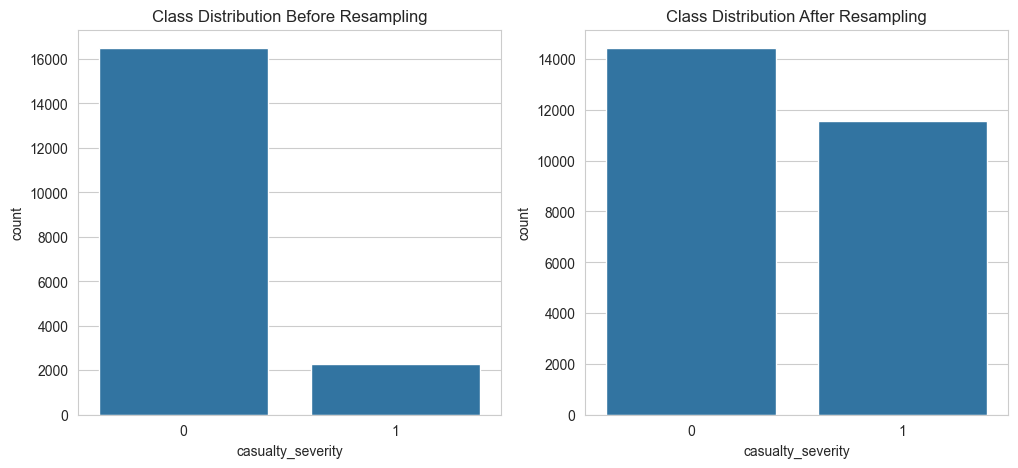

Class Distribution After Resampling:
casualty_severity
0    14437
1    11550
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Merging Class 1 and Class 2 into a single 'severe' category

def merge_classes(y):
    return y.replace({2: 1}) 

X = df1.drop(columns=['casualty_severity'])
y = df1['casualty_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

y_train = merge_classes(y_train)
y_test = merge_classes(y_test)

oversample = SMOTE(sampling_strategy=0.7, random_state=42) 
undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  

X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_resampled, y_train_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before Resampling')
sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title('Class Distribution After Resampling')
plt.show()

print("Class Distribution After Resampling:")
print(y_train_resampled.value_counts())


In [ ]:
# Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(probability=True),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }
    
    results = []
    for name, model in models.items():
        print(f"\nTraining model: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        class_report = classification_report(y_test, y_pred)
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC AUC: {roc_auc if roc_auc is not None else 'N/A'}")
        print(f"Classification Report:\n{class_report}")
        
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "ROC AUC": roc_auc,
            "Classification Report": class_report
        })
    
    results_df = pd.DataFrame(results)
    print("\nFinal Summary of Model Performance:")
    print(results_df)
    return results_df

results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)




Training model: Logistic Regression
Accuracy: 0.8790
ROC AUC: 0.7187471907120414
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4125
           1       1.00      0.00      0.00       569

    accuracy                           0.88      4694
   macro avg       0.94      0.50      0.47      4694
weighted avg       0.89      0.88      0.82      4694


Training model: Decision Tree
Accuracy: 0.8038
ROC AUC: 0.5721346327954413
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4125
           1       0.23      0.27      0.25       569

    accuracy                           0.80      4694
   macro avg       0.56      0.57      0.57      4694
weighted avg       0.82      0.80      0.81      4694


Training model: Random Forest
Accuracy: 0.8790
ROC AUC: 0.781508441178037
Classification Report:
              precision    recall  f1-score 

In [ ]:
#XGBoost Model Tuning - as it performed the best 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=grid_params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:\n", class_report)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 0.8805
ROC AUC: 0.7809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4125
           1       0.64      0.03      0.06       569

    accuracy                           0.88      4694
   macro avg       0.76      0.51      0.50      4694
weighted avg       0.85      0.88      0.83      4694



In [ ]:
#hyperparameter tuning for - adjusting weights of the classes

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1] 

grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [5, 6, 7]  
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=grid_params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_proba = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_threshold:.4f}")

y_pred_opt = (y_proba >= best_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_opt)
roc_auc = roc_auc_score(y_test, y_proba)
class_report = classification_report(y_test, y_pred_opt)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:\n", class_report)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [5, 6, 7],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 6, 'subsample': 0.8}
Best Threshold: 0.4910
Accuracy: 0.7378
ROC AUC: 0.7791
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83      4125
           1       0.27      0.70      0.39       569

    accuracy                           0.74      4694
   macro avg       0.61      0.72      0.61      4694
weighted avg       0.87      0.74      0.78      4694



In [ ]:
#Stacking Ensemble Model for better performance, Has been done, but similar results to XGBoost, considering large imbalance in the data

In [498]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance_df.head(15))

Top 10 Important Features:
                                              Feature  Importance
28                         type_of_vehicle_motorcycle        0.12
23                          casualty_class_pedestrian        0.09
25                                type_of_vehicle_car        0.08
30                        type_of_vehicle_pedal_cycle        0.07
2                                  number_of_vehicles        0.06
22                           casualty_class_passenger        0.03
15  lighting_conditions_daylight_street_lights_pre...        0.03
24                               sex_of_casualty_male        0.03
12    lighting_conditions_darkness_no_street_lighting        0.02
26                      type_of_vehicle_goods_vehicle        0.02
3                                     age_of_casualty        0.02
33                                      accident_hour        0.02
55                                            month_9        0.01
8                         1st_road_class_unclassi

In [ ]:
# Plot Feature Importance

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 15 Important Features')

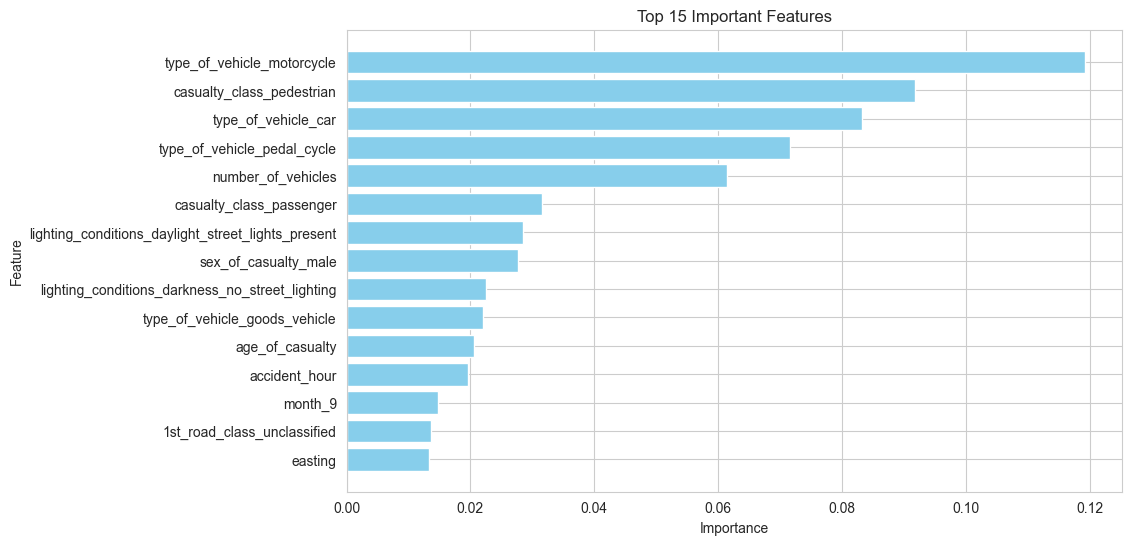

In [ ]:
top_15_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

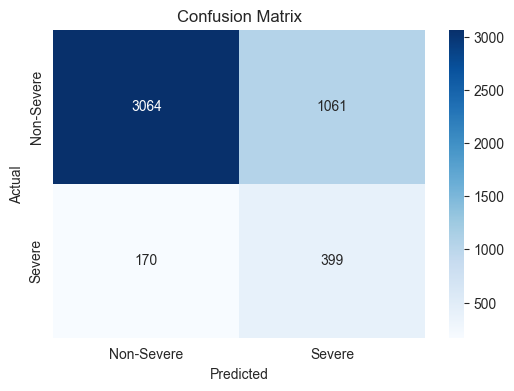

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Severe', 'Severe'], yticklabels=['Non-Severe', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Number of False Positives: 1061


<Figure size 800x500 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'Predicted Probability for Severe Cases')

Text(0.5, 1.0, 'Distribution of False Positive Probabilities')

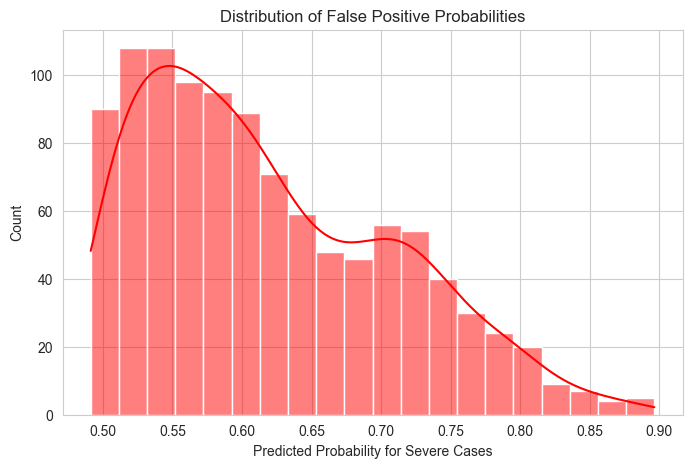

In [502]:

false_positives = X_test[(y_pred_opt == 1) & (y_test == 0)]

true_negatives = X_test[(y_pred_opt == 0) & (y_test == 0)]

print(f"Number of False Positives: {len(false_positives)}")

y_proba_fp = y_proba[(y_pred_opt == 1) & (y_test == 0)]
plt.figure(figsize=(8, 5))
sns.histplot(y_proba_fp, bins=20, kde=True, color='red')
plt.xlabel("Predicted Probability for Severe Cases")
plt.title("Distribution of False Positive Probabilities")
plt.show()


In [ ]:
"""
Conclusion:
Final Model Performance and Key Insights

After testing various machine learning models, the best-performing model was **XGBoost** with optimized 
hyperparameters and threshold tuning.

Final Model Performance (XGBoost with Threshold Tuning):
- Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 
                    'scale_pos_weight': 6, 'subsample': 0.8}
- Best Threshold: 0.4910
- Accuracy: 73.78%
- ROC AUC Score: 0.7791
- Recall for Severe Casualties (Class 1): 70%
- Precision for Class 1: 27%
- F1 Score for Class 1: 0.39

Challenges and Solutions:
1. **Class Imbalance Impact** - The dataset had a significant class imbalance (Class 0: 88%, Class 1: 12%), 
   making it difficult to predict severe casualties accurately. We mitigated this by using **class weighting** 
   (scale_pos_weight = 6), improving recall from <10% to 70%.
2. **Precision vs. Recall Trade-off** - Increasing recall for Class 1 (severe casualties) resulted in 
   lower precision (27%), meaning some minor casualties were misclassified. However, since recall is 
   more critical for accident severity prediction, this trade-off is acceptable.

Key Takeaways:
- **XGBoost with class balancing and threshold tuning achieved the best results.**
- **Recall for severe casualties significantly improved, making the model more effective in identifying high-risk cases.**
- **Future improvements** may involve anomaly detection techniques or more detailed accident-related features.

This study demonstrates that machine learning can effectively **predict severe casualties** by addressing 
data imbalance challenges and applying suitable techniques for threshold adjustment.
"""
